In [2]:
import pandas as pd

In [4]:
df_user_data = pd.read_csv('c:\\temp\\3_user_data.csv',delimiter=',',encoding='Windows-1251')

In [5]:
df_user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [16]:
df_logs = pd.read_csv('c:\\temp\\3_logs.csv',delimiter=',',encoding='Windows-1251')

In [17]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [21]:
df_logs_success = df_logs.query('success == True').groupby('client',as_index=False).agg({'success':'count'})

In [24]:
df_logs.query('client == 9961')

,client,success,platform,time
3,9961,True,phone,1585400189


In [32]:
success = df_logs_success.query('success == 41').sort_values('client')

In [29]:
df_logs.platform.nunique()

3

In [36]:
client_list = list(success['client'])

In [39]:
df_logs_platform = df_logs.query('success == True').groupby('platform',as_index=False).agg({'success':'count'})

In [40]:
df_logs_platform

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


In [41]:
df_logs_user = df_logs.merge(df_user_data,on='client',how='left')

In [42]:
df_logs_user.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0


In [46]:
df_logs_user.query('premium == True').groupby('platform',as_index=False).agg({'client':'count'})

,platform,client
0,computer,150
1,phone,246
2,tablet,24


In [48]:
import seaborn as sns

In [49]:
df_user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [51]:
user_False = df_user_data.query('premium == False')

In [52]:
user_True = df_user_data.query('premium == True')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

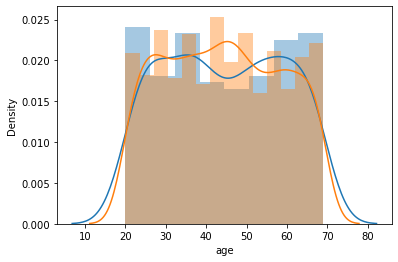

In [56]:
sns.distplot(user_True.age)
sns.distplot(user_False.age)

In [57]:
df_logs_success.head()

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1


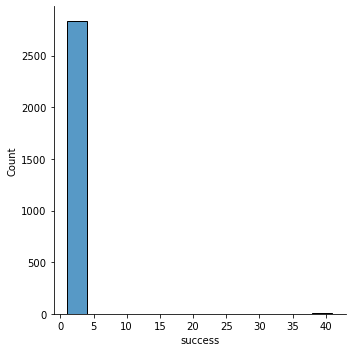

In [58]:
sns.displot(df_logs_success.success)

In [60]:
df_logs_computer = df_logs.query('success == True and platform == "computer"').\
                    groupby('client',as_index=False).\
                    agg({'success':'count'})

In [61]:
df_logs_computer.head()

,client,success
0,164,1
1,315,1
2,405,1
3,502,1
4,946,1


In [62]:
df_comp_age = df_logs_computer.merge(df_user_data,on='client',how='left')

In [63]:
df_comp_age.head()

,client,success,premium,age
0,164,1,False,37.0
1,315,1,NaN,NaN
2,405,1,False,37.0
3,502,1,NaN,NaN
4,946,1,NaN,NaN


In [67]:
countplot_df = df_comp_age.groupby('age',as_index=False).agg({'success':'sum'})

In [68]:
countplot_df.head()

,age,success
0,20.0,11
1,21.0,15
2,22.0,8
3,23.0,15
4,24.0,26


In [88]:
countplot_df.sort_values('success',ascending=False)

,age,success
8,28.0,49
29,49.0,33
5,25.0,33
12,32.0,27
48,68.0,26
4,24.0,26
49,69.0,24
45,65.0,23
32,52.0,22
34,54.0,22


<AxesSubplot:xlabel='age', ylabel='count'>

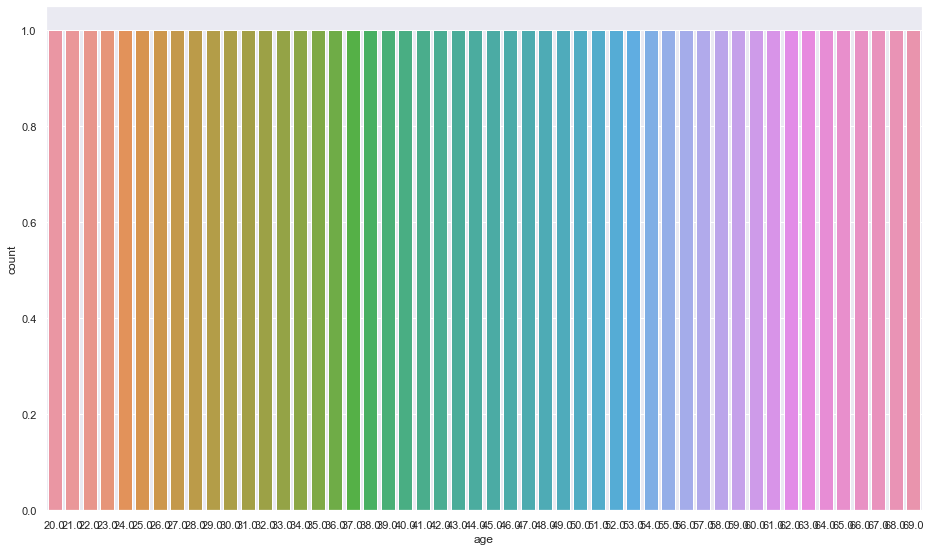